<a href="https://colab.research.google.com/github/rajeshpahari/Own-Work/blob/ML/004_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
display.set_matplotlib_formats('svg')

In [86]:
# from google.colab import files
# files.upload()

# !pip install kaggle
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d nancyalaswad90/review
# !unzip /content/review.zip


In [87]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# EDA-Exploratory data Analysis

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [89]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [90]:
#Target Distribution
df.Outcome.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

<AxesSubplot:>

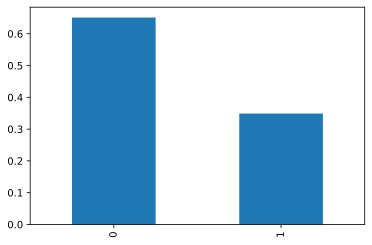

In [91]:
df.Outcome.value_counts(normalize=True).plot(kind='bar')

Observations: Target is not venly distributed...hence it may impact the performance of the Model...We will do something later

In [92]:
#Lets see the corelaton of each features with target...through visualizations
sns.pairplot(df)

<AxesSubplot:>

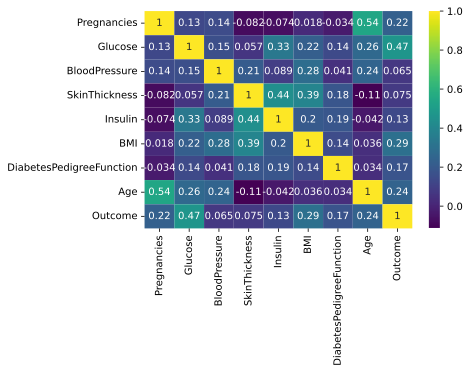

In [93]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')

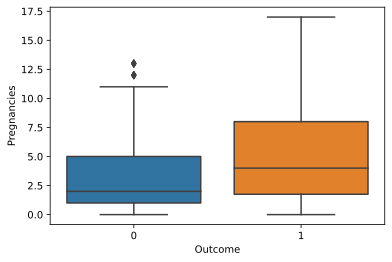

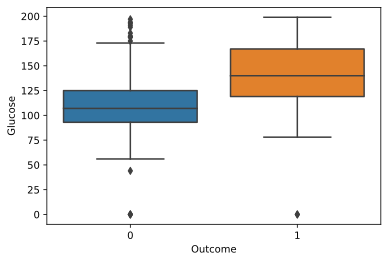

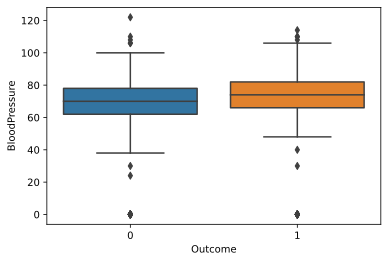

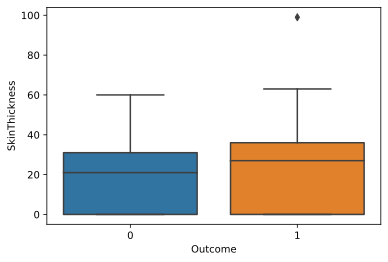

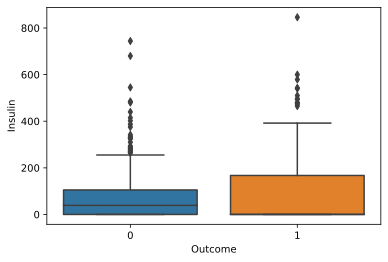

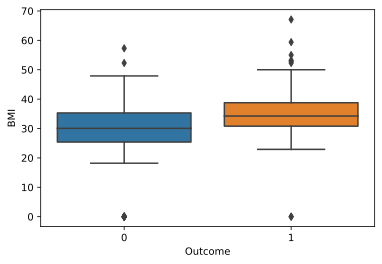

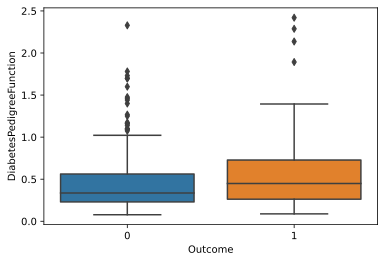

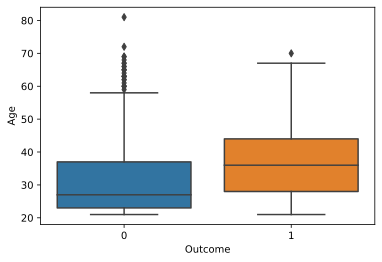

In [94]:
# relation of each variable with outcomes...lets observe
for i in df.drop('Outcome',axis=1).columns:
  
  sns.boxplot(x='Outcome',y=i,data=df)
  plt.show() 

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


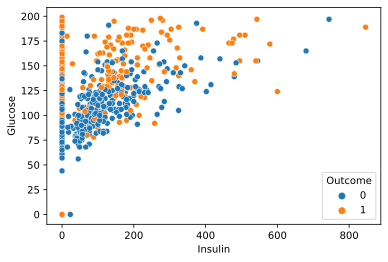

In [95]:
#lets see insulin & glucose scatterplot
plt.figure(dpi=150)
sns.scatterplot(df.Insulin,df.Glucose,hue=df.Outcome);

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


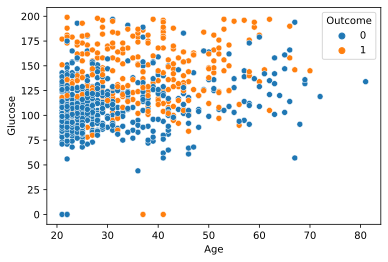

In [96]:
#Any relationship with Age?
plt.figure(dpi=150)
sns.scatterplot(df.Age,df.Glucose,hue=df.Outcome);

In [97]:
len(df),len(df[df.Outcome==1]),len(df[df.Outcome==0])

(768, 268, 500)

In [98]:
df0=df[df.Outcome==0]
len(df0)


500

In [99]:
df1=df[df.Outcome==1]
len(df1)

268

In [100]:
df0_mod= df0[0:268]
len(df0_mod)

268

In [101]:
df3=pd.concat([df0_mod,df1],axis=0)
df3.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1             1       85             66             29        0  26.6   
3             1       89             66             23       94  28.1   
5             5      116             74              0        0  25.6   
7            10      115              0              0        0  35.3   
10            4      110             92              0        0  37.6   

    DiabetesPedigreeFunction  Age  Outcome  
1                      0.351   31        0  
3                      0.167   21        0  
5                      0.201   30        0  
7                      0.134   29        0  
10                     0.191   30        0

In [102]:
# df=df3.sample(frac=1,axis=0)

In [103]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [104]:
X=df.drop('Outcome',axis=1)
y=df.Outcome
X.shape,y.shape,df.shape

((768, 8), (768,), (768, 9))

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [106]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [107]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [108]:
model.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [109]:
#model.predict_proba(X_test)

In [110]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('\n\nAccuracy Score: ', accuracy_score(y_test,model.predict(X_test)))
print('\n\nClassification Report: \n',classification_report(y_test,model.predict(X_test)))
print('\n\nConfusion Matrix:\n ',confusion_matrix(y_test,model.predict(X_test)))




Accuracy Score:  0.8116883116883117


Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       110
           1       0.67      0.68      0.67        44

    accuracy                           0.81       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.81      0.81      0.81       154



Confusion Matrix:
  [[95 15]
 [14 30]]


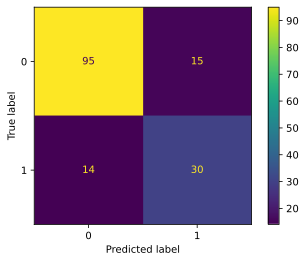

In [111]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test,model.predict(X_test)),display_labels=model.classes_).plot();

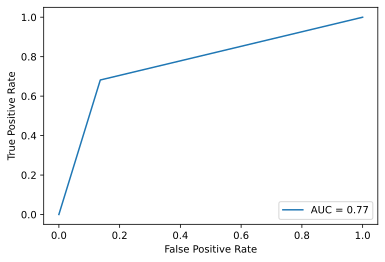

In [112]:
from sklearn.metrics import roc_auc_score,RocCurveDisplay
from sklearn import metrics
roc_auc_score(y_test,model.predict(X_test))
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict(X_test))
roc_auc = metrics.auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()


Lets work on different parameter to bring some improved result....you may run by balancing target data ..that will reduce no of samples ..so accuracy will be reduced